In [1]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import ma
from pathlib import Path

In [11]:
# enable or disable missing observations
use_mask = 1

In [ ]:
# reading data (quick and dirty)
Time=[]
X=[]

In [221]:
# for line in open('./dataset_01.csv'):
#     f1, f2  = line.split(';')
#     Time.append(float(f1))
#     X.append(float(f2))

path = Path(r'C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\combined_fred_data.csv')
data = pd.read_csv(path, index_col=0)

In [222]:
data.index = pd.to_datetime(data.index)
data = data.loc['1/7/1967':,]
Time = data.index
X = data['initial_claims'].values

In [223]:
(data.index[1] - data.index[0]).days

1

In [224]:
if (use_mask):
    X = ma.asarray(X)
    # Mask datapoints 300 through 500
    X[np.isnan(X)] = ma.masked

In [225]:
# Filter Configuration

# time step
Time = data.index
dt = (Time[2] - Time[1]).days

In [226]:
# transition_matrix  
F = [[1,  dt,   0.5*dt*dt], 
     [0,   1,          dt],
     [0,   0,           1]]  

# observation_matrix   
H = [1, 0, 0]

# transition_covariance 
Q = [[   1,     0,     0], 
     [   0,  1e-4,     0],
     [   0,     0,  1e-6]] 

# observation_covariance 
R = [0.04] # max error = 0.6m

# initial_state_mean
X0 = [0,
      0,
      0]

# initial_state_covariance
P0 = [[ 10,    0,   0], 
      [  0,    1,   0],
      [  0,    0,   1]]

In [227]:
n_timesteps = len(Time)
n_dim_state = 3

In [228]:
filtered_state_means = np.zeros((n_timesteps, n_dim_state))
filtered_state_covariances = np.zeros((n_timesteps, n_dim_state, n_dim_state))

In [229]:
# Kalman-Filter initialization
kf = KalmanFilter(transition_matrices = F, 
                  observation_matrices = H, 
                  transition_covariance = Q, 
                  observation_covariance = R, 
                  initial_state_mean = X0, 
                  initial_state_covariance = P0)

In [230]:
# iterative estimation for each new measurement
for t in range(n_timesteps):
    if t == 0:
        filtered_state_means[t] = X0
        filtered_state_covariances[t] = P0
    else:
        filtered_state_means[t], filtered_state_covariances[t] = (
        kf.filter_update(
            filtered_state_means[t-1],
            filtered_state_covariances[t-1],
            observation = X[t])
        )

In [231]:
position_sigma = np.sqrt(filtered_state_covariances[:, 0, 0]);        

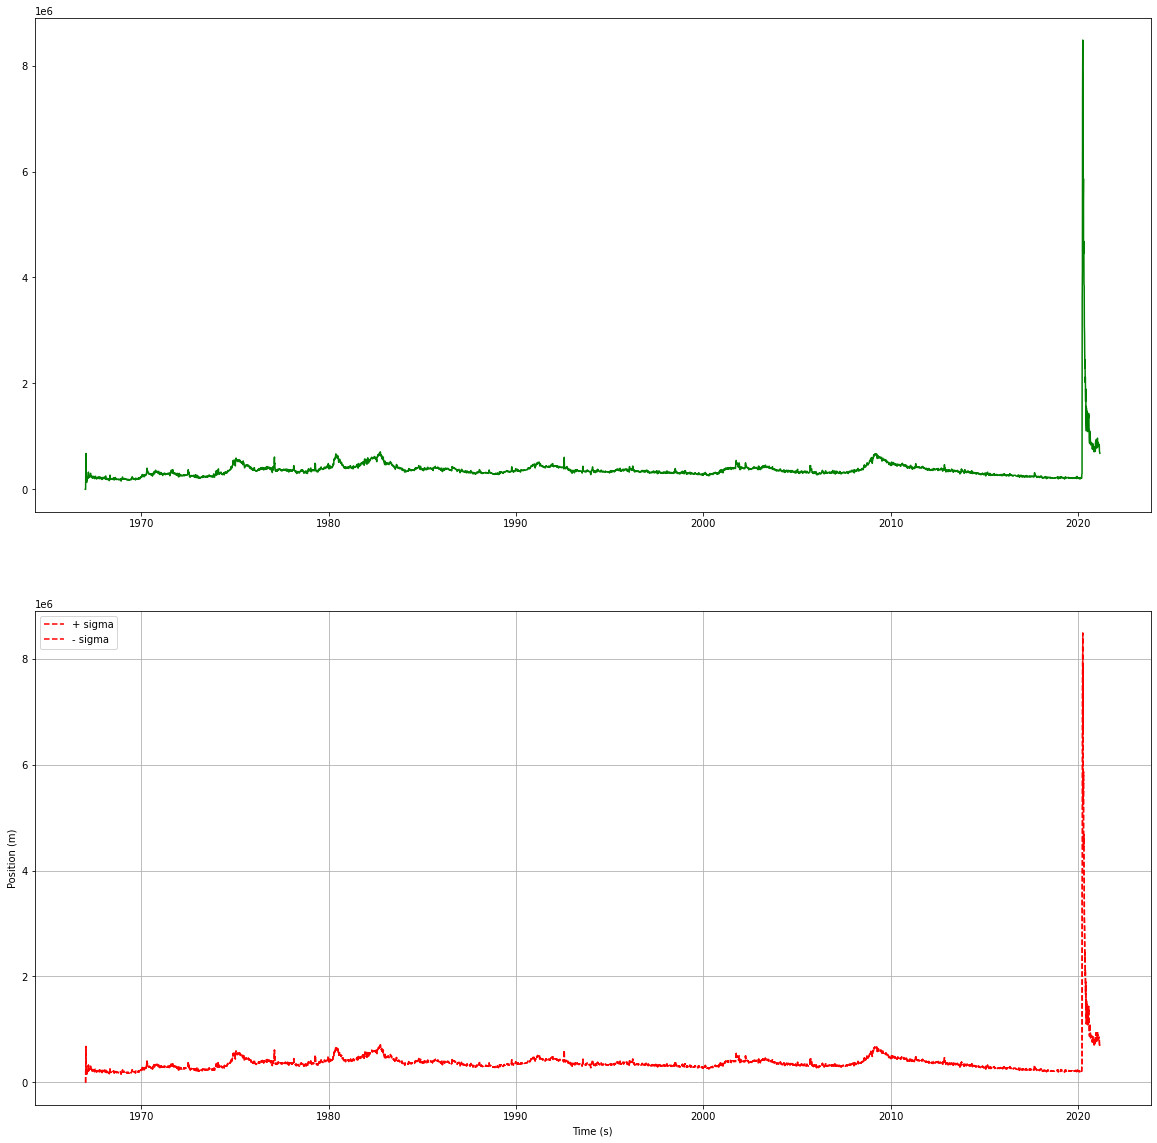

In [232]:
# plot of the resulted trajectory        
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20))
#axes[0].plot(Time, X.data, "k-", label="Actual", markersize=20)
ax1.plot(Time, filtered_state_means[:, 0], "g-", label="Filtered position", markersize=1)
ax2.plot(Time, filtered_state_means[:, 0] + position_sigma, "r--", label="+ sigma", markersize=1)
ax2.plot(Time, filtered_state_means[:, 0] - position_sigma, "r--", label="- sigma", markersize=1)
plt.grid()
plt.legend(loc="upper left")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()      

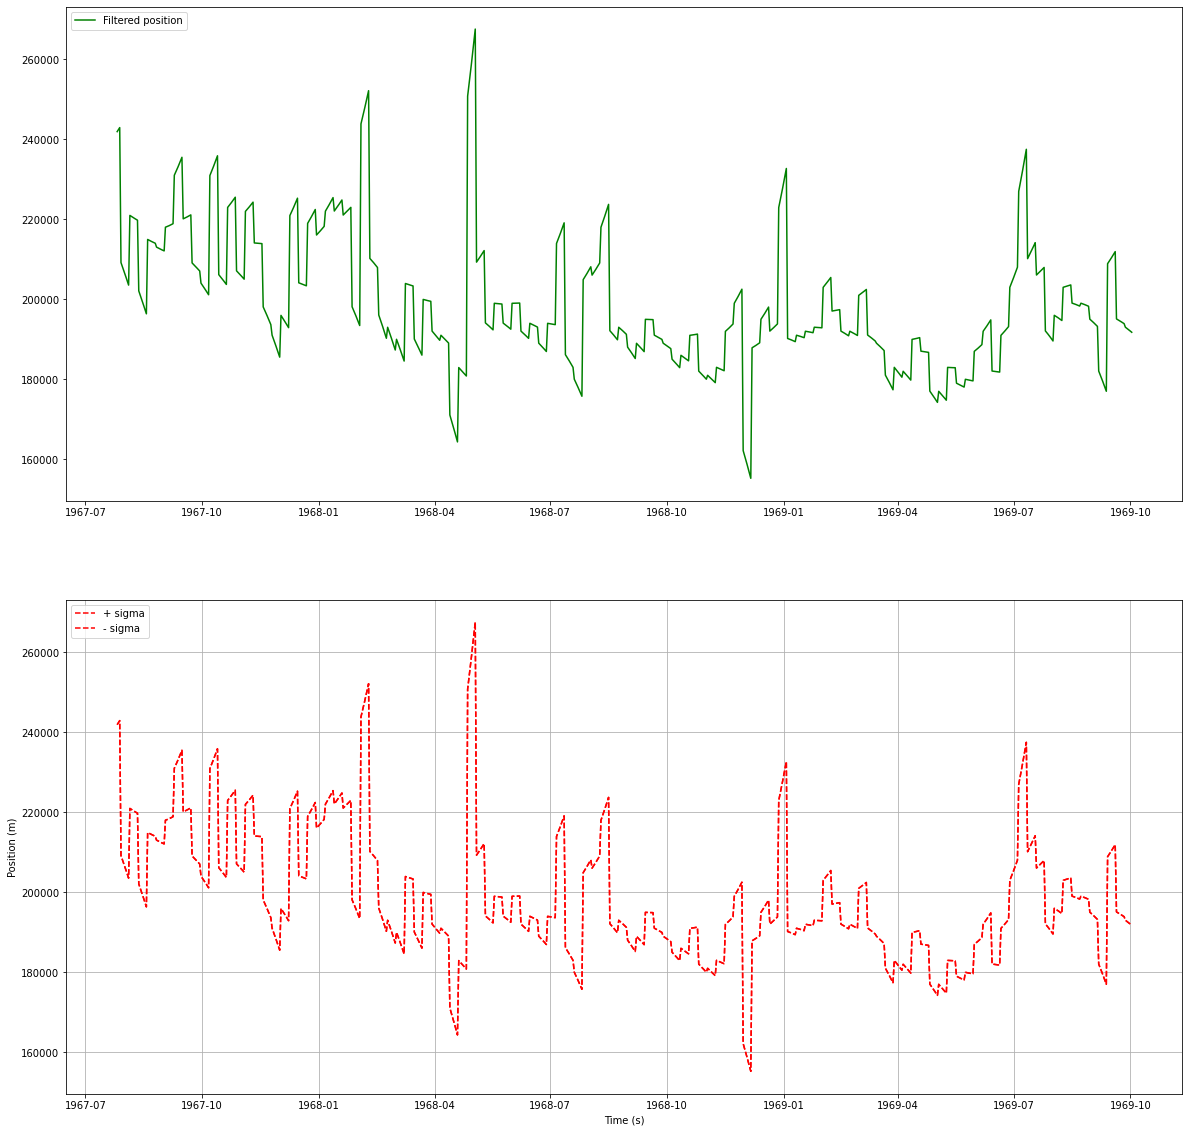

In [233]:
# plot of the resulted trajectory        
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20))
#axes[0].plot(Time, X.data, "k-", label="Actual", markersize=20)
ax1.plot(Time[200:1000], filtered_state_means[200:1000, 0], "g-", label="Filtered position", markersize=1)
ax2.plot(Time[200:1000], filtered_state_means[200:1000, 0] + position_sigma[200:1000], "r--", label="+ sigma", markersize=1)
ax2.plot(Time[200:1000], filtered_state_means[200:1000, 0] - position_sigma[200:1000], "r--", label="- sigma", markersize=1)
plt.grid()
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()      

In [234]:
X

masked_array(data=[208000.0, --, --, ..., --, --, --],
             mask=[False,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20)

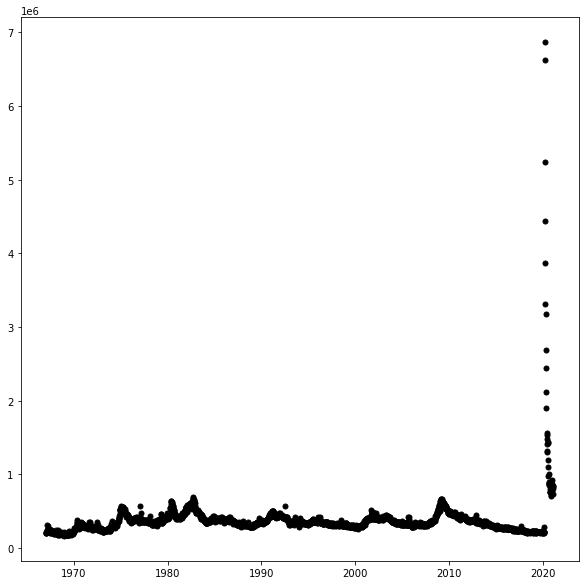

In [235]:
fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.plot(Time, data['initial_claims'].values, "ko", label="Actual", markersize=5)

In [173]:
filtered_vals = filtered_state_means[:, 0]

In [80]:
?np.putmask

Docstring:
putmask(a, mask, values)

Changes elements of an array based on conditional and input values.

Sets ``a.flat[n] = values[n]`` for each n where ``mask.flat[n]==True``.

If `values` is not the same size as `a` and `mask` then it will repeat.
This gives behavior different from ``a[mask] = values``.

Parameters
----------
a : array_like
    Target array.
mask : array_like
    Boolean mask array. It has to be the same shape as `a`.
values : array_like
    Values to put into `a` where `mask` is True. If `values` is smaller
    than `a` it will be repeated.

See Also
--------
place, put, take, copyto

Examples
--------
>>> x = np.arange(6).reshape(2, 3)
>>> np.putmask(x, x>2, x**2)
>>> x
array([[ 0,  1,  2],
       [ 9, 16, 25]])

If `values` is smaller than `a` it is repeated:

>>> x = np.arange(5)
>>> np.putmask(x, x>1, [-33, -44])
>>> x
array([  0,   1, -33, -44, -33])
Type:      function


In [236]:
X2 = X.copy()
np.putmask(X2, np.isnan(X2), filtered_vals)

In [237]:
X2.data

array([208000.        ,      0.        ,      0.        , ...,
       187330.71597533, 186416.58994126, 185487.74787968])

In [238]:
X2[X2 == 0]

masked_array(data=[],
             mask=[],
       fill_value=1e+20,
            dtype=float64)

In [239]:
X2[np.isnan(X2)]

masked_array(data=[],
             mask=[],
       fill_value=1e+20,
            dtype=float64)

In [246]:
X.data[-20:]

array([    nan,     nan, 841000.,     nan,     nan,     nan,     nan,
           nan,     nan, 730000.,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,     nan])

In [245]:
X2[-20:].data.astype('int')

array([196047, 195131, 841000, 193237, 192258, 191258, 190237, 192984,
       192082, 730000, 190224, 189269, 188296, 187304, 189984, 189114,
       188230, 187330, 186416, 185487])

In [242]:
X2.

SyntaxError: invalid syntax (<ipython-input-242-8abc7c5d95c9>, line 1)

In [197]:
X[20:]

masked_array(data=[--, 204000.0, --, ..., --, --, --],
             mask=[ True, False,  True, ...,  True,  True,  True],
       fill_value=1e+20)

In [198]:
# Get index position of first non-nan value
np.argwhere(~np.isnan(X[20:]))[0][0]

1

In [185]:
len(X.data[20:])

19333

In [216]:
data['initial_claims']

1967-01-07    208000.0
1967-01-08         NaN
1967-01-09         NaN
1967-01-10         NaN
1967-01-11         NaN
                ...   
2019-12-28    220000.0
2019-12-29         NaN
2019-12-30         NaN
2019-12-31         NaN
2020-01-01         NaN
Name: initial_claims, Length: 19353, dtype: float64

In [215]:
data['initial_claims'][data['initial_claims'].index[2]:]

1967-01-09         NaN
1967-01-10         NaN
1967-01-11         NaN
1967-01-12         NaN
1967-01-13         NaN
                ...   
2019-12-28    220000.0
2019-12-29         NaN
2019-12-30         NaN
2019-12-31         NaN
2020-01-01         NaN
Name: initial_claims, Length: 19351, dtype: float64